In [4]:
# Capstone Project: Product Retail Prices Survey (2007-2015)
## Author: Kevin Moreno

### Project Overview:
This capstone explores the product Retail Prices Survey dataset from 2017 to 2025. The goal is to identify meaninful patterns,trends, and insights that can inform retail pricing strategies, and inflation trends, consumer behavior across different regions and products.

### Main Objectives:
- Understand pricing trends across years
-Identify product categories with the highest fluctuations
-Explore regional price differences 
-Generate actionable insights for business or consumers





In [177]:
#Import Required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#load my dataset

df=pd.read_csv('Retail_Prices_of _Products.csv')






In [179]:
## data Cleansing 

##This section will include  

#-Removing or imputing missing data
#-Checking for null values
df.isnull().sum()

#-Formatting columns (dates, currencies, etc)

#Combine 'Year' and 'Month' into a new "Date' Column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

#-Removing duplicatees if needed 
df.duplicated().sum() 
df[df.duplicated()]










    

,Year,Month,GEO,Product Category,Products,VALUE,Taxable,Total tax rate,Value after tax,Essential,COORDINATE,UOM,Date


In [144]:

### Step 2: Data Cleansing

#- Checked for null values: No missing data found.
#- Checked for duplicates: No duplicates found.
#- Formatted 'Year' and 'Month' as datetime columns for better organization.


In [ ]:
##Issue to Analyze (Dervied from Issue Tree)

#1. Pricing Trends
#2. Product Category Analysis
#3. Regional Price Comparison
#4. Inflation Indicators/ Outliers
#5. Impact of Global events. (pandemic, Inflation)


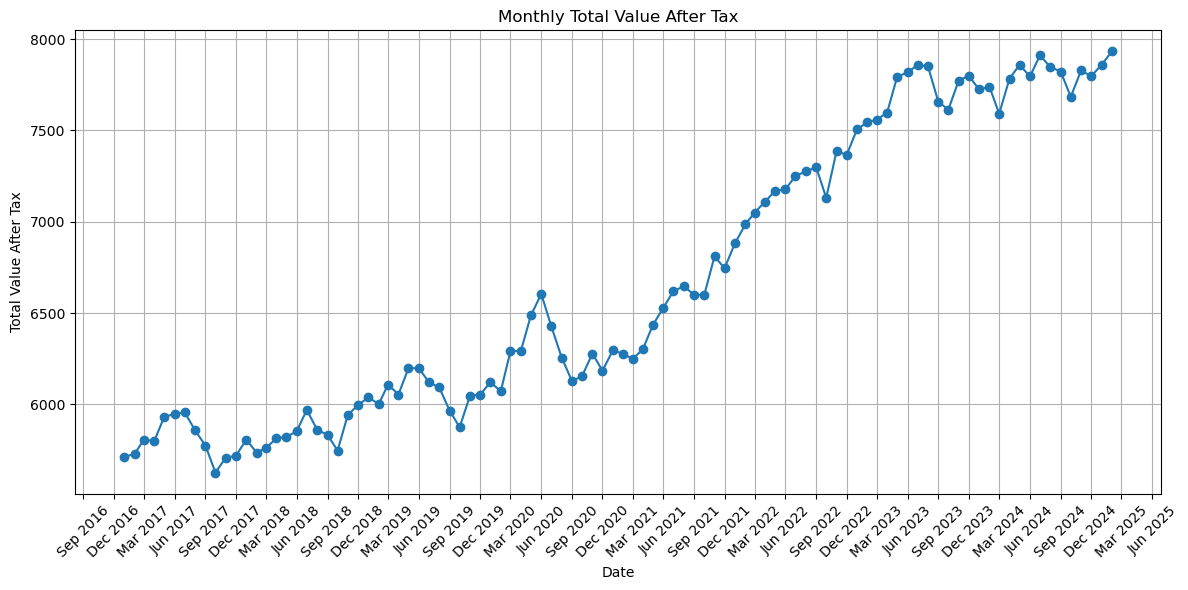

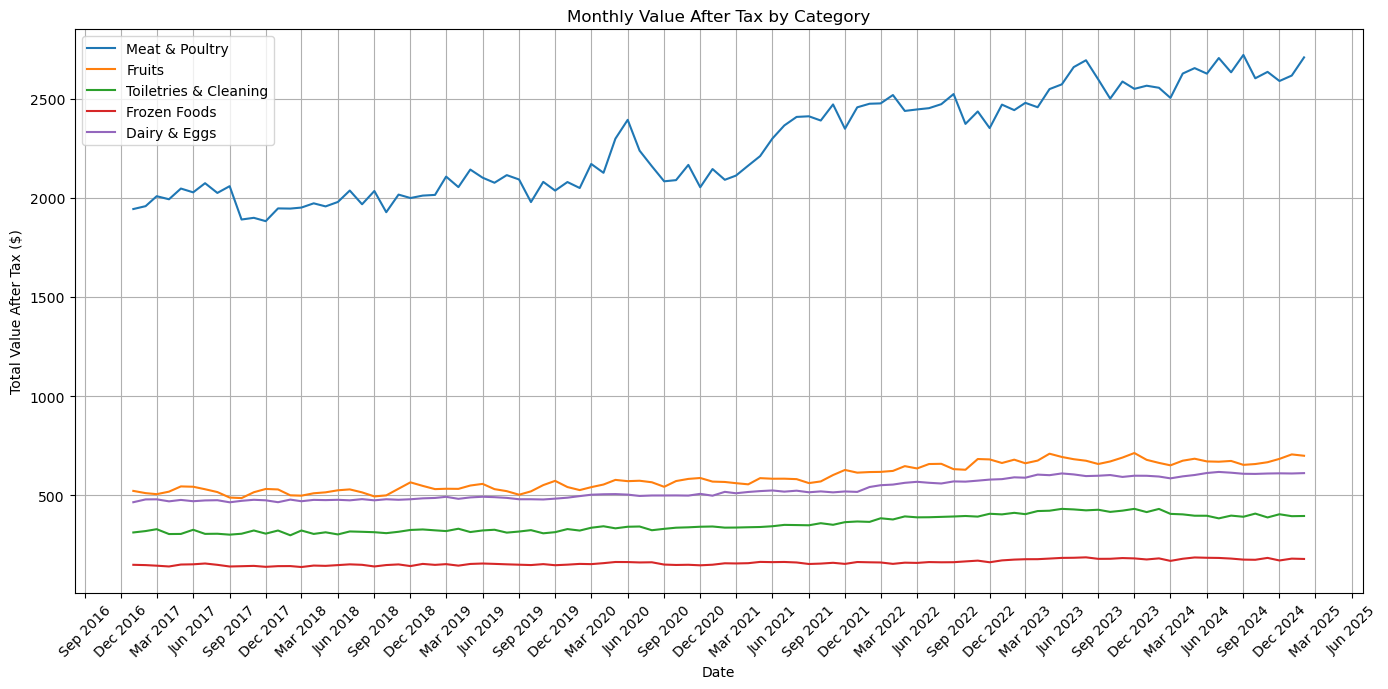

In [148]:

#MONTHLY TREND ANALYSIS 
monthly_trends= df.groupby('Date')['Value after tax'].sum().reset_index()

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 

plt.figure(figsize=(12,6))
plt.plot(monthly_trends['Date'], monthly_trends['Value after tax'], marker='o')
plt.title('Monthly Total Value After Tax')
plt.xlabel('Date')
plt.ylabel('Total Value After Tax')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



#2 MONTHLY TRENDS by PRODUCT CATEGORY
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

categories= ['Meat & Poultry', 'Fruits', 'Toiletries & Cleaning', 'Frozen Foods', 'Dairy & Eggs']

plt.figure(figsize=(14,7))

for category in categories:
    cat_data=df[df['Product Category'] == category]
    cat_monthly= cat_data.groupby('Date')['Value after tax'].sum().reset_index()
    plt.plot(cat_monthly['Date'], cat_monthly['Value after tax'], label = category)

plt.title('Monthly Value After Tax by Category')
plt.xlabel('Date')
plt.ylabel('Total Value After Tax ($)')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
    






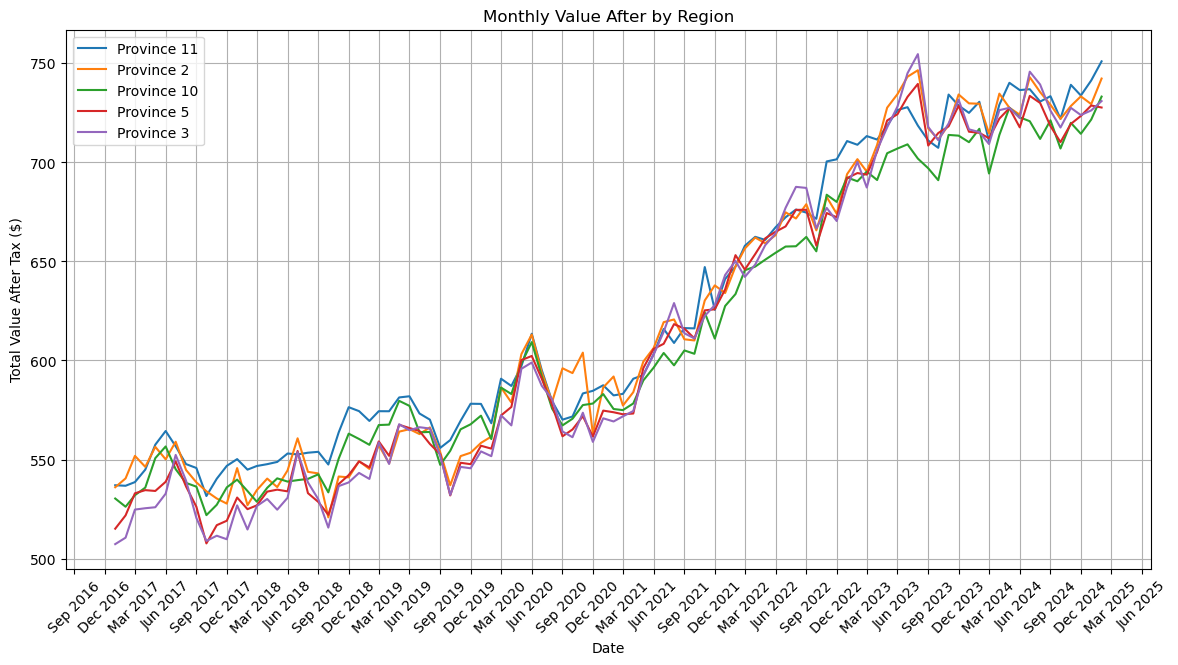

In [146]:
 #REGIONAL PRICE COMPARISION 
regional_monthly=df.groupby(['Date', 'GEO'])['Value after tax'].sum().reset_index()

region_totals= regional_monthly.groupby('GEO')['Value after tax'].sum().reset_index()

top_regions= region_totals.nlargest(5, 'Value after tax')['GEO']

filtered_data= regional_monthly[regional_monthly['GEO'].isin(top_regions)]

plt.figure(figsize=(14,7))

for region in top_regions:
    region_data= filtered_data[filtered_data['GEO'] == region]
    plt.plot(region_data['Date'], region_data['Value after tax'], label=region)

plt.title('Monthly Value After by Region')
plt.xlabel('Date')
plt.ylabel('Total Value After Tax ($)')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)

plt.show()






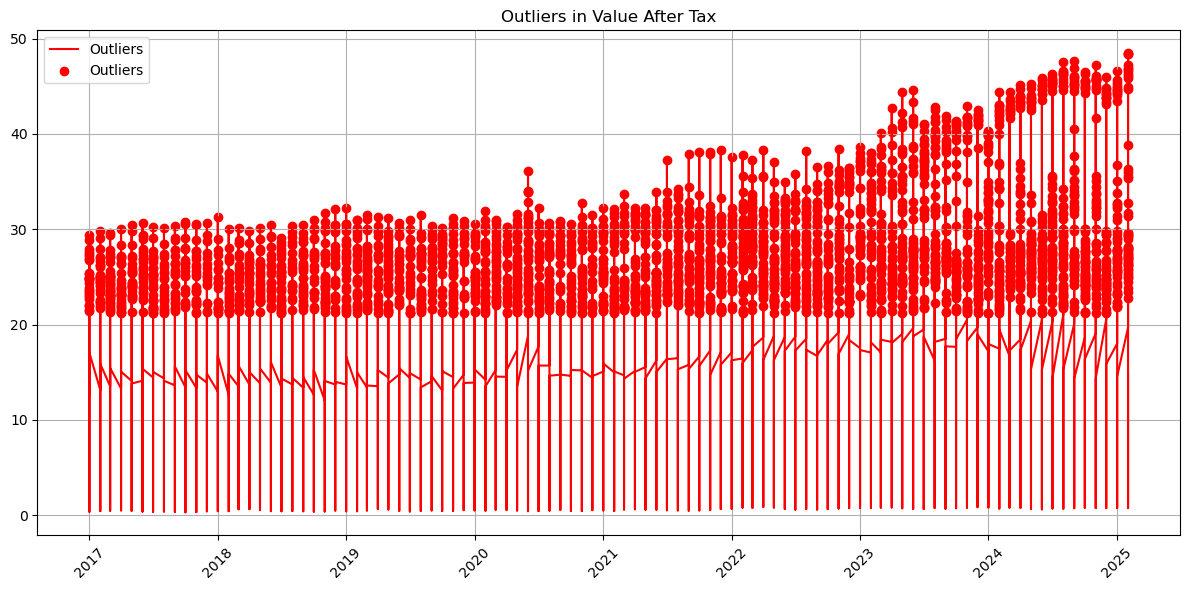

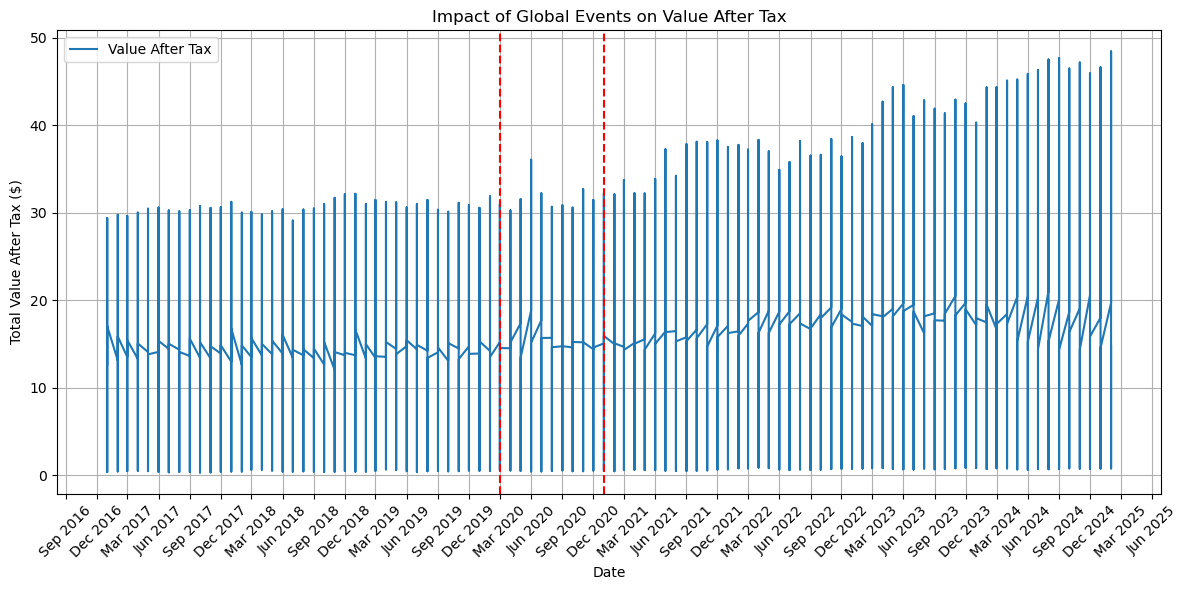

In [174]:
#Inflation Indicators/ Outliers 

#Identifying outliers 
from scipy import stats

df['z_score'] = stats.zscore(df['Value after tax'])

outliers = df[(df['z_score'] >3) | (df['z_score'] < -3)]

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Value after tax'], color = 'red', label= 'Outliers')
plt.scatter(outliers['Date'], outliers['Value after tax'], color='red' , label='Outliers')
plt.title('Outliers in Value After Tax')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#Impact of Global Events (Pandemic, Inflation)

#Marking the pandemic start date and inflation period as evemt dates
event_dates= [ '2020-03-01', '2021-01-01']
event_labels = [ 'Pandemic Start', 'Inflation Period Start']

event_dates= pd.to_datetime(event_dates)

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Value after tax'], label = 'Value after tax')
for i, event in enumerate(event_dates):
    plt.axvline(x=event, color='red', linestyle='--', label= event_labels[i])

plt.title('Impact of Global Events on Value After Tax')
plt.xlabel('Date')
plt.ylabel('Total Value After Tax ($)')
plt.grid(True)
plt.legend(['Value After Tax'])

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
                                                    
    




## Key Insights 
#INSIGHT 1: Pricing Trends
The total value of tax displayed a consistent upward trend between 2019 and 2022, notable surges beginning in March 2020. 
This sharp increase coincides with the onset of the COVID-19 pandemic, suggesting increased consumer spending on essentials and stockpilling behaviors.
Following the initial spike, the growth rate stablized but remained higher than pre-pandemic levels, including a lasting shift in consumer purchasing patterns.
Beginning in early 2021, the trendline steepened again, likely reflecting the impact of rising inflation on overall sales values.

#INSIGHT 2: PRODUCT Category Perfomance 
Across all product categories, Meat & Poultry consistently generated the highest sales throughout the period.
Other essential catergories like Fruit, Dairy & Eggs, and Toiletries & cleaning saw substantial growth during the early pandemic months, aligning with changes in consumer priorities towards health, hygiene, and food security.
Frozen Foods also displayed steady growth, suggesting a preference for stockpilling long-lasting food during uncertain periods. 

#INSIGHT 3: Regional Sales Comparison 
Among the top five regions, each experienced similar spikes in sales starting in March 2020, but the recovery and subsequent growth rates varied. 
Some regions maintained higher levels of spending post-pandemic, suggesting differences in economic resilience, population demographics, or pandemic management strategies. 
Despite these variations, the overall pattern indicates that global events had a widespread impact across all regions, albeit to differing degrees. 

Insight 4: Impact of Global Events 
Key global events such as the COVID-19 pandemic and the oneset of inflation visibly influenced consumer behavior, as shown by distinct inflection points in the sales data. 
The pandemic's start triggered immediate and sharp increases in spending, while the beginning of the inflation period correlated with gradual but notable acceleration in sales values.
These patterns reinforce the strong connection between external macroeconomic factors and consumer purchasing behavior, underlining the importance of context-aware business stategies.

Overall, the data suggests that consumer habits evolved rapidly during times of uncertainty and economic pressure.
Businesses that adapted to increased demand in essential categories and adjusted for inflationary pricing were likely better positioned to succeed in this shifting landscape. 


